# Zillow Prize: Zillow’s Home Value Prediction (Zestimate)

### Can you improve the algorithm that changed the world of real estate?

## Overall Process we gonna do
- 1) Data Exploration
    - Visualize
    - Find missing
    - Look for corelations
- 2) Data Cleaning
    - Check : did I fix potential issues?
- 3) Model Building
    - Visualize Results
    - Model Diagnositics
    - Residual diagnositics
    - ROC curves
    - etc
- 4) Present Results
    - Charts
    - Graphs
    - Tables
    - Visualizations to explain model, explain results

### Train/Test split
- You are provided with a full list of real estate properties in three counties (Los Angeles, Orange and Ventura, California) data in 2016.
- The train data has all the transactions before October 15, 2016, plus some of the transactions after October 15, 2016.
- The test data in the public leaderboard has the rest of the transactions between October 15 and December 31, 2016.
- The rest of the test data, which is used for calculating the private leaderboard, is all the properties in October 15, 2017, to December 15, 2017. This period is called the "sales tracking period", during which we will not be taking any submissions.
- You are asked to predict 6 time points for all properties: October 2016 (201610), November 2016 (201611), December 2016 (201612), October 2017 (201710), November 2017 (201711), and December 2017 (201712).
- Not all the properties are sold in each time period. If a property was not sold in a certain time period, that particular row will be ignored when calculating your score.
- If a property is sold multiple times within 31 days, we take the first reasonable value as the ground truth. By "reasonable", we mean if the data seems wrong, we will take the transaction that has a value that makes more sense.

- properties_2016.csv 
    - all the properties with their home features for 2016. Note: Some 2017 new properties don't have any data yet except for their parcelid's. Those data points should be populated when properties_2017.csv is available.
- properties_2017.csv 
    - all the properties with their home features for 2017 (released on 10/2/2017)
- train_2016.csv 
    - the training set with transactions from 1/1/2016 to 12/31/2016
- train_2017.csv 
    - the training set with transactions from 1/1/2017 to 9/15/2017 (released on 10/2/2017)
- sample_submission.csv 
    - a sample submission file in the correct format

### About data
- properties_2016.csv
- train_2016.csv
- properties_2017.csv
- train_2017.csv
- sample_submission.csv
- zillow_data_dictionary.xlsx
- Downloads link: https://www.kaggle.com/c/zillow-prize-1/data

## 1. Data Exploration

### 1.1) Import packages

In [2]:
#Import Numerical Analysis packages
import numpy as np
import scipy as sp
# Import Data Analysis packages
import pandas as pd
#Import visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
#For visualizing in notebooks
%matplotlib inline

### 1.2) Read data form of csv file

In [3]:
prop_16 = pd.read_csv('properties_2016.csv')
train_16 = pd.read_csv('train_2016_v2.csv',parse_dates=['transactiondate'])

/home/hskimim/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
train_16.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [9]:
prop_16.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


rename = [
'parcelid',
'type_aircon',
'type_archi',
'sqft_base',
'cnt_bath',
'cnt_bed',
'type_buildqual',
'type_buildclas',
'cnt_calbath',
'type_deck',
'cnt_thrquartbath',
'area_firstfloor',
'area_calculatedtotal',
'area_base',
'area_finished',
'area_perimeter',
'area_total',
'area_firstfloor50',
'code_fedralinfo',
'cnt_fire',
'flag_fire',
'cnt_fullbath',
'cnt_garage',
'sqft_garage',
'flag_hotspa',
'type_heating',
'latitude',
'longitude',
'lotsizesquarefeet',
'cnt_story',
'cnt_pool',
'sqft_pool',
'type_hotspa',
'type_poolwith',
'type_poolwithout',
'code_countylanduse',
'type_landuse',
'desc_landuse',
'rawcensustractandblock',
'censustractandblock',
'county_id',
'city_id',
'zip_id',
'neighbor_id',
'cnt_room',
'type_story',
'type_construct',
'cnt_unit',
'sqft_patio',
'sqft_shed/buildinyard',
'year_built',
'tax_totalparcel',
'tax_structure',
'tax_landarea',
'tax_totalprop',
'year_assessdproptax',
'flag_delinquency2015',
'year_deilinquency'
]

In [ ]:
prop_16.rename(columns=[])

# Train data 파헤치기!!

## Logerror Analysis

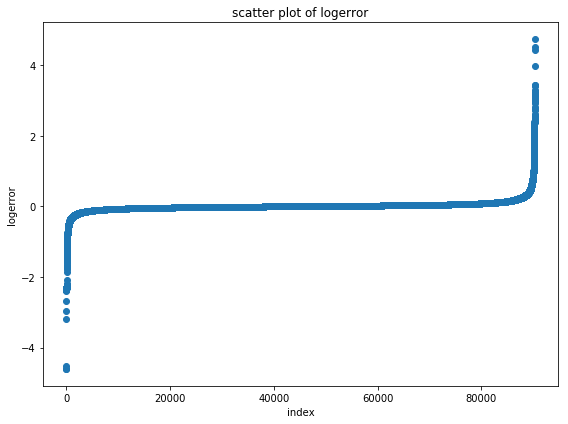

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(range(len(train_16.logerror)),np.sort(train_16.logerror))
plt.title('scatter plot of logerror')
plt.xlabel('index')
plt.ylabel('logerror')
plt.tight_layout()
plt.show()

logerror의 scatter plot을 그려보니, two-sided tail에 outlier가 있는 것으로 보인다.

/home/hskimim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


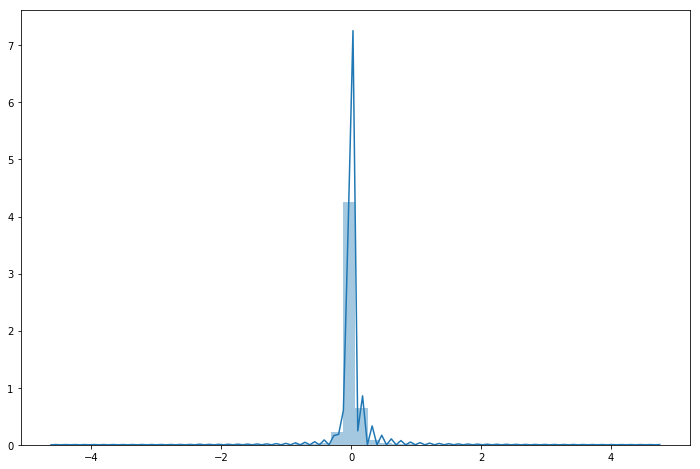

In [11]:
plt.figure(figsize=(12,8))
sns.distplot(train_16.logerror.values)
plt.show()

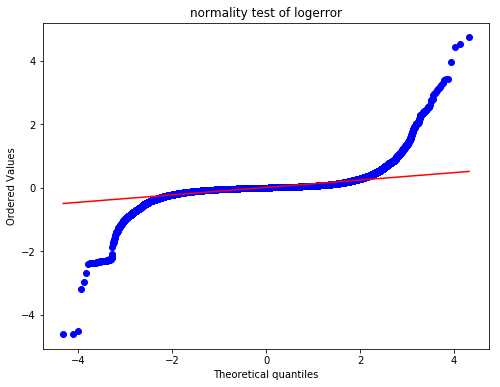

In [12]:
plt.figure(figsize=(8,6))
sp.stats.probplot(train_16.logerror.values,plot=plt)
plt.title('normality test of logerror')
plt.show()

outlier로 인해서 logerror에 대한 dist가 양측이 매우 크게 형성된다. outlier를 제거해보자

In [14]:
upextreme = np.percentile(train_16.logerror.values,99)
downextreme = np.percentile(train_16.logerror.values,1)
# outlier를 제거하기 위해 percentile로 1<logerror<99 에 있게하여야 합니다.
upextreme

0.4638819999999963

In [15]:
train_16['logerror'].loc[train_16.logerror > upextreme] = upextreme
train_16['logerror'].loc[train_16.logerror < downextreme] = downextreme
# 위 두개의 식은 percentile 99 위, 1 아래에 있는 숫자를 해당 percentile 99,1에 해당하는 숫자로 전부 
# 바꿔서 outlier를 없애는 방식입니다.

/home/hskimim/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


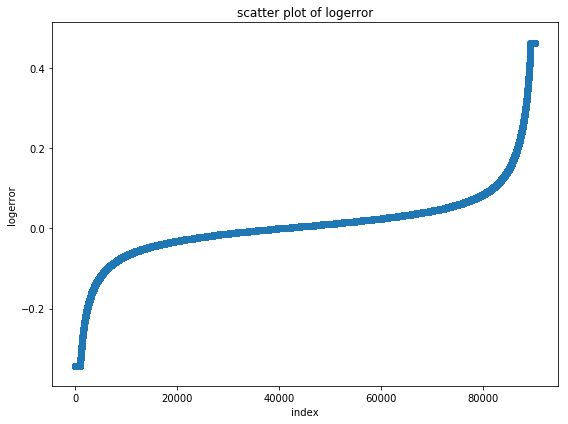

In [16]:
plt.figure(figsize=(8,6))
plt.scatter(range(len(train_16.logerror)),np.sort(train_16.logerror))
plt.title('scatter plot of logerror')
plt.xlabel('index')
plt.ylabel('logerror')
plt.tight_layout()
plt.show()

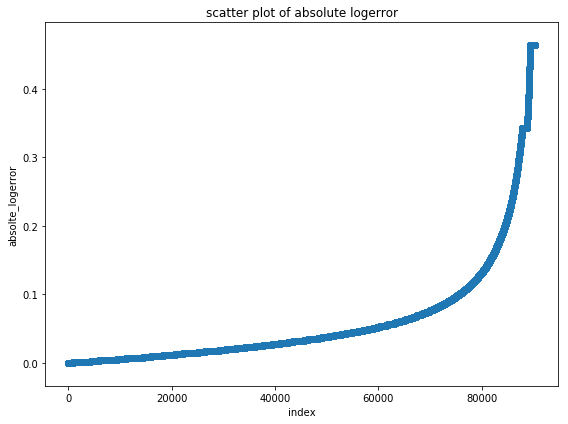

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(range(len(train_16.logerror)),np.sort(np.abs(train_16.logerror)))
plt.title('scatter plot of absolute logerror')
plt.xlabel('index')
plt.ylabel('absolte_logerror')
plt.tight_layout()
plt.show()

/home/hskimim/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


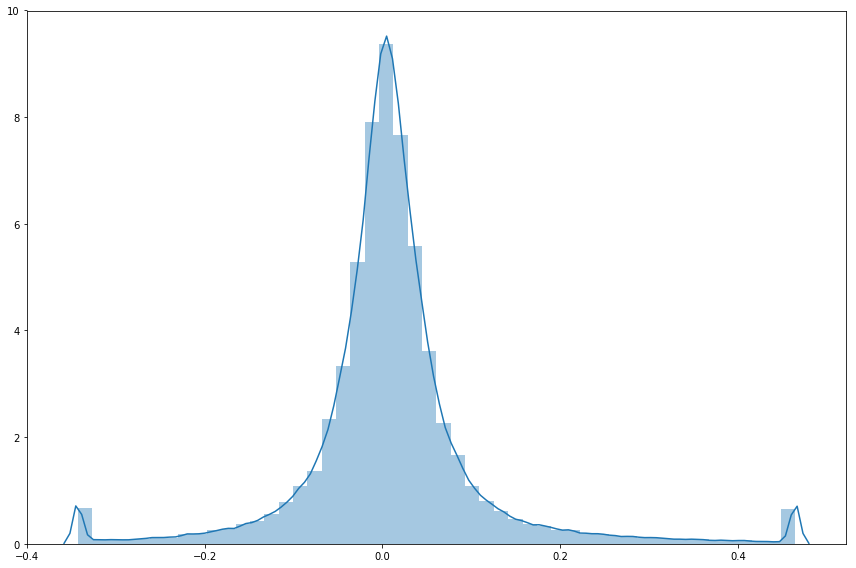

In [19]:
plt.figure(figsize=(12,8))
sns.distplot(train_16.logerror.values)
plt.tight_layout()
plt.show()

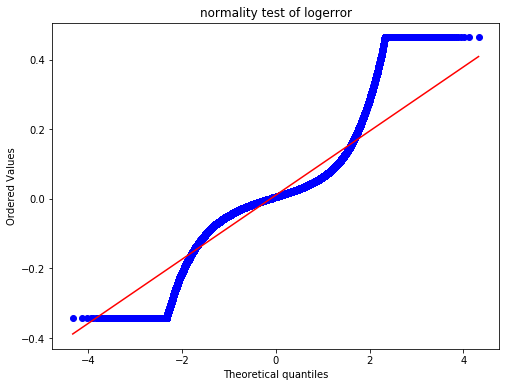

In [24]:
plt.figure(figsize=(8,6))
sp.stats.probplot(train_16.logerror.values,plot=plt)
plt.title('normality test of logerror')
plt.show()

outlier들을 (극단화된 값을) 제거해주니 분포가 정규성을 상대적으로 띄게 되었지만, 아직 normal distribution 이라고 할 수는 없다.

## Transactiondate analysis

In [14]:
train_16_month = train_16
train_16_month.transactiondate = train_16_month.transactiondate.dt.month
logerror_month = train_16_month.groupby('transactiondate').agg(['mean','size']).reset_index()
logerror_month
logerror_month.drop('parcelid',axis=1,inplace=True)
logerror_month
logerror_month.rename(columns={'transactiondate':'transactionmonth','logerror':'mean&size of logerror'})
logerror_month.logerror

/home/hskimim/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


,mean,size
0,0.014661,6556
1,0.013930,6333
2,0.006445,8652
3,0.005696,9311
4,0.006560,9961
5,0.007453,10922
6,0.010577,9947
7,0.010793,10476
8,0.014558,9575
9,0.016341,4977


### Changes in logerror over times

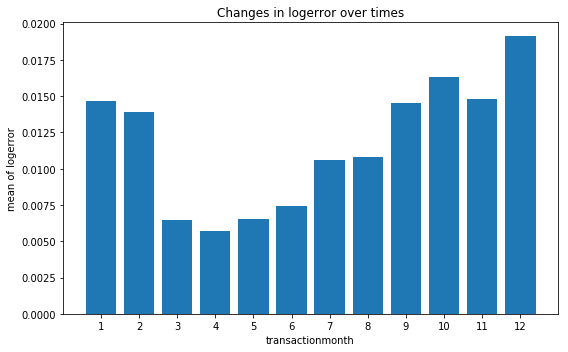

In [15]:
plt.figure(figsize=(8,5))
plt.bar(logerror_month.transactiondate,logerror_month.logerror['mean'])
plt.title('Changes in logerror over times')
plt.xlabel("transactionmonth")
plt.ylabel("mean of logerror")
plt.xticks(np.arange(1,13))
plt.tight_layout()
plt.show()

### Changes in transaction over times

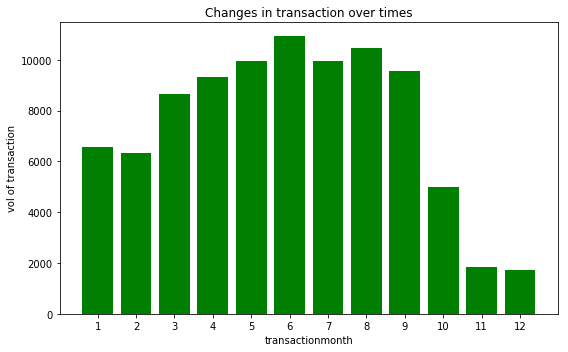

In [16]:
plt.figure(figsize=(8,5))
plt.bar(logerror_month.transactiondate,logerror_month.logerror['size'],color= 'green')
plt.title('Changes in transaction over times')
plt.xlabel("transactionmonth")
plt.ylabel("vol of transaction")
plt.xticks(np.arange(1,13))
plt.tight_layout()
plt.show()

market sentiment(시장 분위기)와 같은 logerror에 잠재적으로 영향을 끼칠 수 있는 요소들이 데이터 셋에는 고려되지 않았습니다. 이 요소는 시간에 따른 logerror의 변화와 거래 볼륨을 통해 유추할 수 있습니다. 2016년 데이터에 한정되어서 살펴보게 되면, market sentiment가 logerror에 영향을 끼쳤다고 주장하거나 일반화할 수 있는 확실한 근거는 없지만, 후의 data cleaning 과정에 사용할 수 있기 때문에 해당 자료를 고려하겠습니다.

### About Parcelid

In [17]:
train_16.parcelid.head()

0    11016594
1    14366692
2    12098116
3    12643413
4    14432541
Name: parcelid, dtype: int64

이번에는 transaction이 된 house의 ID를 의미하는 parcelid에 대해서 value_count를 해보겠습니다. 중복되는 parcelid가 있는지에 대해, 중복되는 parcelid가 있다면 얼마나 있는지 확인해보겠습니다.

In [18]:
train_16.parcelid.head()

0    11016594
1    14366692
2    12098116
3    12643413
4    14432541
Name: parcelid, dtype: int64

In [19]:
overlapped_parcelid = (train_16.parcelid.value_counts().reset_index())['parcelid'].value_counts()

In [20]:
overlapped_parcelid

1    90026
2      123
3        1
Name: parcelid, dtype: int64

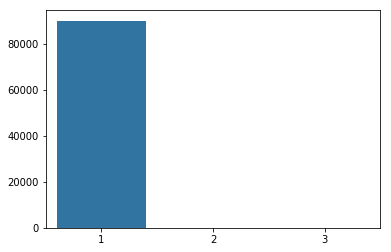

In [21]:
sns.barplot(overlapped_parcelid.index,overlapped_parcelid.values)

중복되는 parcelid의 데이터가 있지만 위의 bar plot에서 볼 수 있다시피, 상대적으로 보면, 각각의 ID는 한 번씩 나온다고 할 수 있습니다.

## train 과 prop 데이터 scale이 다르기 때문에 parcelid 에 따라서 merge해줍니다.

In [26]:
print('length of train_16 data set: {}'.format(len(train_16)))
print('length of property_16 data set: {}'.format(len(prop_16)))

length of train_16 data set: 90275
length of property_16 data set: 2985217


In [22]:
train_df = pd.merge(train_16,prop_16,on='parcelid', how ='left')

In [23]:
print(len(train_df))
train_df.head()

90275


,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,1,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,1,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,1,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,1,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,1,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


## dtype 분석하기

In [24]:
prop_16.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [25]:
data_typeDF = prop_16.iloc[:,1:].dtypes.value_counts().reset_index()\
.rename(columns={"index":"variableType",0:"count"})
data_typeDF
# parcelid dtype은 빼주었습니다.

,variableType,count
0,float64,52
1,object,5


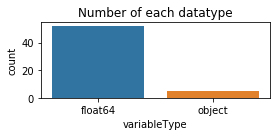

In [26]:
plt.figure(figsize=(4,2))
sns.barplot(data_typeDF['variableType'],data_typeDF['count'])
plt.title('Number of each datatype')
plt.tight_layout()
plt.show()

In [27]:
numerical_col = []
categorical_col = []
for col in train_df.columns:
    if train_df[col].dtypes == 'float64':
        numerical_col.append(col)
    else:
        categorical_col.append(col)

In [28]:
print("Num of Numerical data columns :", len(numerical_col),"\n")
print("Num of Numerical data columns name : ", numerical_col, "\n\n\n")
print("Num of Categorical data columns :", len(categorical_col),"\n")
print("Categorical data columns name :", categorical_col)

Num of Numerical data columns : 53 

Num of Numerical data columns name :  ['logerror', 'airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid', 'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid', 'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet', 'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity', 'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt', 'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid', 'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt', 'numberofstories', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt'

numerical & categorical visualization conde analysis

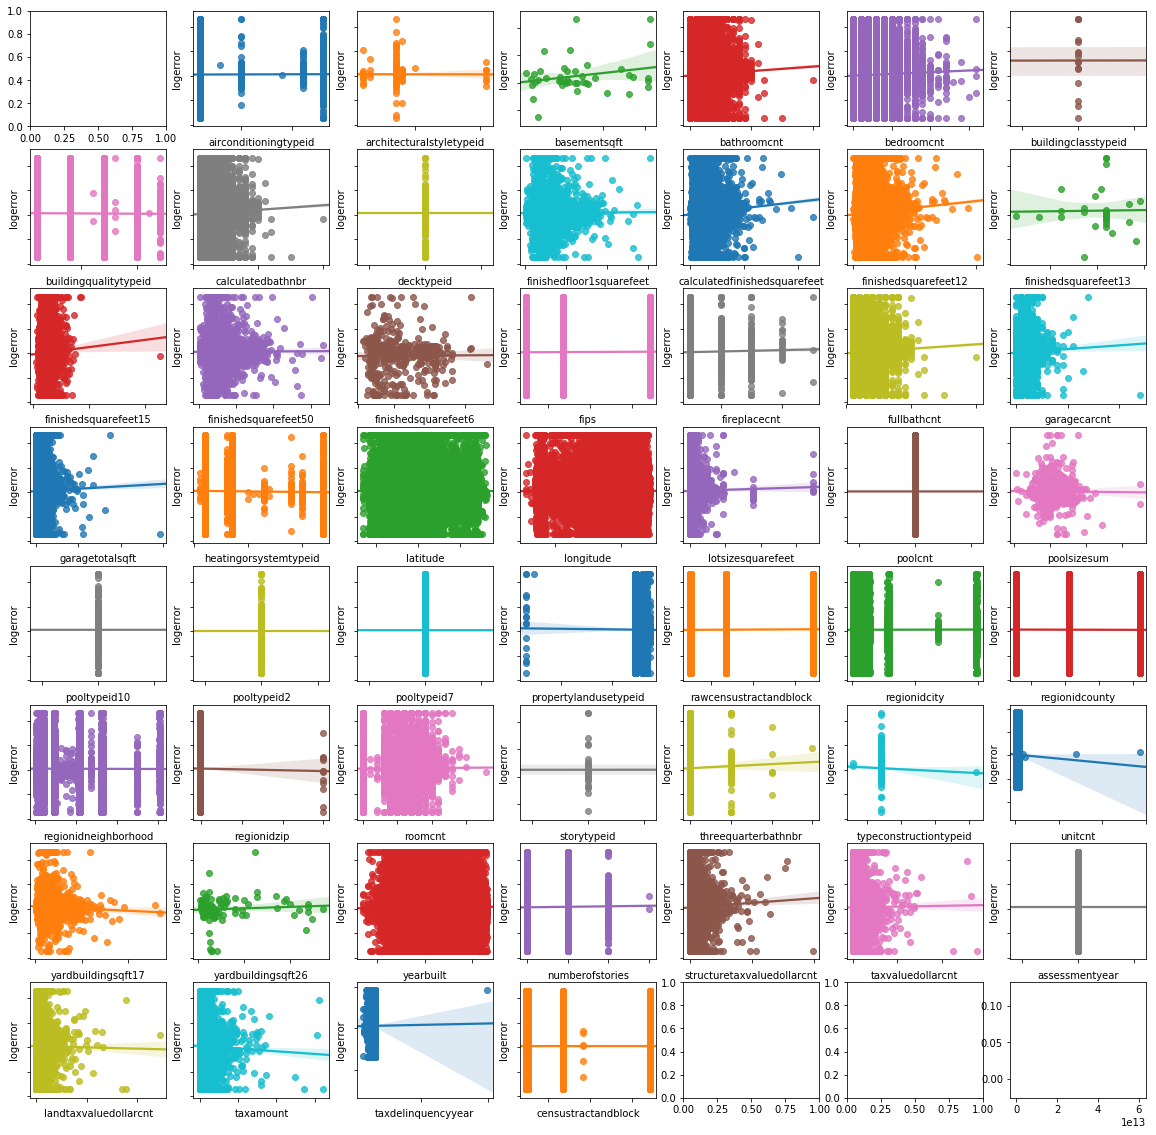

In [29]:
fig,ax = plt.subplots(8,7,figsize = (20,20))
for idx,col in enumerate(numerical_col):
    if col == 'logerror':
        continue
    sns.regplot(x=col , y = 'logerror' ,data = train_df , ax= ax[idx//7, idx%7])
    ax[idx//7,idx%7].set(yticklabels=[])
    ax[idx//7,idx%7].set(xticklabels=[])
    
    continue

In [ ]:
fig,ax = plt.subplots(3,3,figsize = (20,20))

for idx,col in enumerate(categorical_col):
    
    sns.countplot(x=col,data = train_df , ax= ax[idx//3, idx%3])
    ax[idx//3,idx%3].set(yticklabels=[])
    
    continue

## missing_value 분석하기

- missing_value를 분석할 때는, merged 데이터가 아니라 기존의 properties데이터 내에서 missing_value 규모를 분석합니다.
- 그 이유는 이후에 실시할, imputation strategy에서 missing_value ratio에 따라서 컬럼(factor)에 대한 imputation을 진행할 것이기 때문에 총 데이터가 있어야 합니다.

In [ ]:
missing_df = prop_16.isnull()
missing_df.head()

In [ ]:
missing_df = prop_16.isna().sum().reset_index().rename(columns={'index':'missing_col',0:'missing_count'})
missing_df = missing_df.loc[missing_df.missing_count>0]
missing_df.sort_values(by='missing_count',inplace=True)
missing_df.index = missing_df.index.sort_values()
missing_df.head()

## first method

In [ ]:
plt.figure(figsize=(16,12))
plt.barh(missing_df.missing_col,missing_df.missing_count)
plt.show()

## second method

In [ ]:
ind = np.arange(len(missing_df))
fig,ax = plt.subplots(figsize=(12,18))
ax.barh(ind, missing_df.missing_count.values, color='green')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.missing_col.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

subplot 명령은 그리드(grid) 형태의 Axes 객체들을 생성하는데 Figure가 행렬(matrix)이고 Axes가 행렬의 원소라고 생각하면 된다. 예를 들어 위와 아래 두 개의 플롯이 있는 경우 행이 2 이고 열이 1인 2x1 행렬이다. subplot 명령은 세개의 인수를 가지는데 처음 두개의 원소가 전체 그리드 행렬의 모양을 지시하는 두 숫자이고 세번째 인수가 네 개 중 어느것인지를 의미하는 숫자이다. 따라서 위/아래 두개의 플롯을 하나의 Figure 안에 그리려면 다음처럼 명령을 실행해야 한다. 여기에서 숫자 인덱싱은 파이썬이 아닌 Matlab 관행을 따르기 때문에 첫번째 플롯을 가리키는 숫자가 0이 아니라 1임에 주의하라.

99%이상이 missingnum인 column을 dataframe으로 나타내보자!!

In [ ]:
missing_df.head(3)

In [ ]:
missing_df = train_df.isnull().sum().reset_index().rename(columns={'index':'missing_col',0:'missing_count'})
missing_df = missing_df.loc[missing_df.missing_count>0]
missing_df.sort_values(by='missing_count',inplace=True)
missing_df['missing_ratio']= missing_df.missing_count/ len(train_df)
missing_df.loc[missing_df.missing_ratio>0.99]

### 위의 데이터프레임에서 구한 missing_ratio columns 는 후에 imputation strategy에서 missing value operation을 할 때 사용된다.

## Data Cleaning
-  We don’t know how did Zillow get the result of Zestimate from their models. I mean, it’s highly likely that the inaccuracy of Zestimate is somewhat related to the missingness. That is to say, the value we need to predict in here, the logerror, is just introduced by those missing values. So it would be a very interesting that we could train the model while preserving those NA information to some extent in the data. However, we also need to provide an imputation version of the data, which would be more reasonable to train the model in common situation, like what we were always doing in most Kaggle machine learning competitions.

- First approach:
    - Preserve all the columns, made some reasonable imputations, e.g. area / num_garage, area / num_pool, etc.;
    - set the NAs to zero;
    - Shrink the number of levels by separating categorical columns to fit in different models, i.e. Rpart, RandomForest.
- Second approach:
    - Delete columns with more than 75% missingness;
    - Remove duplicated, highly correlated columns, which may cause collinearity;
    - Scale the geographical information;
    - Remove all NA property observations (11437 out of 2985217 properties observations)

In [ ]:
train_df.head()